# **Importing the Library**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install tensorflow==2.3.1 keras==2.4.1

     |████████████████████████████████| 320.4 MB 29 kB/s 
     |████████████████████████████████| 169 kB 44.7 MB/s 
     |████████████████████████████████| 459 kB 46.4 MB/s 
     |████████████████████████████████| 2.9 MB 39.2 MB/s 
     |████████████████████████████████| 20.1 MB 1.3 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Attempting uninstall: tensorflow
    Found existing installat

In [5]:
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

Using TensorFlow backend.


# **Data Exploration**

In [6]:
# Resizinig all the images to (224,224)
IMAGE_SIZE = [224,224]

train_path = '/content/drive/MyDrive/plant/data/train'
test_path = '/content/drive/MyDrive/plant/data/test'

# **Image Preprocessing & Feature Extraction**

In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=False)

# Performing only scaling on the test dataset

test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_set = train_datagen.flow_from_directory(train_path,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 239 images belonging to 5 classes.
Found 239 images belonging to 5 classes.


# **Inception ResNet V2**

In [9]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from tensorflow.keras.models import Model
inc=InceptionResNetV2(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

219062272/219055592 [==============================] - 4s 0us/step


In [10]:
x31 = Flatten()(inc.output)
predictionss = Dense(5, activation='softmax')(x31)

In [11]:
modelss = Model(inputs = inc.inputs, outputs = predictionss)
modelss.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [13]:
modelss.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
r2 = modelss.fit(train_set, validation_data=test_set, epochs=50, steps_per_epoch=len(train_set), validation_steps=len(test_set))
x=r2

Epoch 1/5
8/8 [==============================] - 16s 2s/step - loss: 1.5909 - accuracy: 0.9456 - val_loss: 34542.3164 - val_accuracy: 0.2092
Epoch 2/5
8/8 [==============================] - 12s 2s/step - loss: 0.3225 - accuracy: 0.9456 - val_loss: 143174880.0000 - val_accuracy: 0.2092
Epoch 3/5
8/8 [==============================] - 13s 2s/step - loss: 0.2656 - accuracy: 0.9707 - val_loss: 13945420.0000 - val_accuracy: 0.2092
Epoch 4/5
8/8 [==============================] - 12s 2s/step - loss: 0.3400 - accuracy: 0.9707 - val_loss: 452765312.0000 - val_accuracy: 0.2092
Epoch 5/5
8/8 [==============================] - 12s 2s/step - loss: 0.0506 - accuracy: 0.9833 - val_loss: 3940177664.0000 - val_accuracy: 0.2092


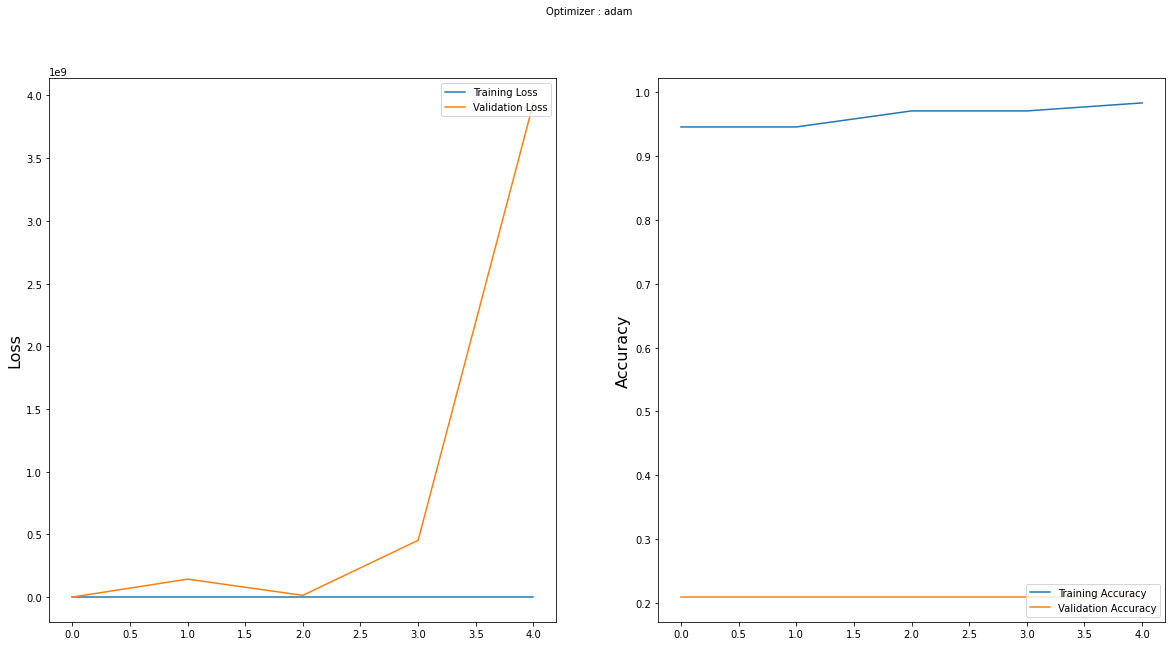

In [14]:
import matplotlib.pyplot as plt

x=r2
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [15]:
modelss.save('/content/drive/MyDrive/plant/model1.h5')

# **RNN**

In [16]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import numpy as np

In [17]:
np.random.seed(1000)

#Instantiation
RNN = Sequential()

#1st Convolutional Layer
RNN.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='same'))
#RNN.add(BatchNormalization())
RNN.add(Activation('relu'))
RNN.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
RNN.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
#RNN.add(BatchNormalization())
RNN.add(Activation('relu'))
RNN.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
RNN.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
#RNN.add(BatchNormalization())
RNN.add(Activation('relu'))

#4th Convolutional Layer
RNN.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
#RNN.add(BatchNormalization())
RNN.add(Activation('relu'))

#5th Convolutional Layer
RNN.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
#RNN.add(BatchNormalization())
RNN.add(Activation('relu'))
RNN.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
RNN.add(Flatten())
# 1st Fully Connected Layer
RNN.add(Dense(4096, input_shape=(32,32,3,)))
#RNN.add(BatchNormalization())
RNN.add(Activation('relu'))
# Add Dropout to prevent overfitting
RNN.add(Dropout(0.4))
#2nd Fully Connected Layer
RNN.add(Dense(4096))
#RNN.add(BatchNormalization())
RNN.add(Activation('relu'))
#Add Dropout
RNN.add(Dropout(0.4))

#3rd Fully Connected Layer
RNN.add(Dense(1000))
#RNN.add(BatchNormalization())
RNN.add(Activation('relu'))
#Add Dropout
RNN.add(Dropout(0.4))

#Output Layer
RNN.add(Dense(5))
#RNN.add(BatchNormalization())
RNN.add(Activation('softmax'))

In [18]:
RNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_203 (Conv2D)          (None, 56, 56, 96)        34944     
_________________________________________________________________
activation_203 (Activation)  (None, 56, 56, 96)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 28, 28, 96)        0         
_________________________________________________________________
conv2d_204 (Conv2D)          (None, 28, 28, 256)       614656    
_________________________________________________________________
activation_204 (Activation)  (None, 28, 28, 256)       0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_205 (Conv2D)          (None, 14, 14, 384)       8

In [19]:
RNN.compile(loss = tensorflow.keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

In [20]:
#Learning Rate Annealer
from keras.callbacks import ReduceLROnPlateau
lrr= ReduceLROnPlateau(monitor='val_acc',   factor=.01,   patience=3,  min_lr=1e-5) 

In [21]:
r2 = RNN.fit(train_set, validation_data=test_set, epochs=100, steps_per_epoch=len(train_set), validation_steps=len(test_set))
x=r2

Epoch 1/10
8/8 [==============================] - 10s 1s/step - loss: 3.0742 - accuracy: 0.2343 - val_loss: 1.6155 - val_accuracy: 0.2092
Epoch 2/10
8/8 [==============================] - 6s 751ms/step - loss: 1.6138 - accuracy: 0.2092 - val_loss: 1.6094 - val_accuracy: 0.2092
Epoch 3/10
8/8 [==============================] - 6s 744ms/step - loss: 1.6094 - accuracy: 0.2092 - val_loss: 1.6078 - val_accuracy: 0.2092
Epoch 4/10
8/8 [==============================] - 6s 725ms/step - loss: 1.6088 - accuracy: 0.1967 - val_loss: 1.6071 - val_accuracy: 0.2092
Epoch 5/10
8/8 [==============================] - 6s 722ms/step - loss: 1.6077 - accuracy: 0.1883 - val_loss: 1.6065 - val_accuracy: 0.2092
Epoch 6/10
8/8 [==============================] - 6s 722ms/step - loss: 1.6072 - accuracy: 0.2134 - val_loss: 1.6052 - val_accuracy: 0.2092
Epoch 7/10
8/8 [==============================] - 6s 741ms/step - loss: 1.6069 - accuracy: 0.2008 - val_loss: 1.6038 - val_accuracy: 0.2134
Epoch 8/10
8/8 [======

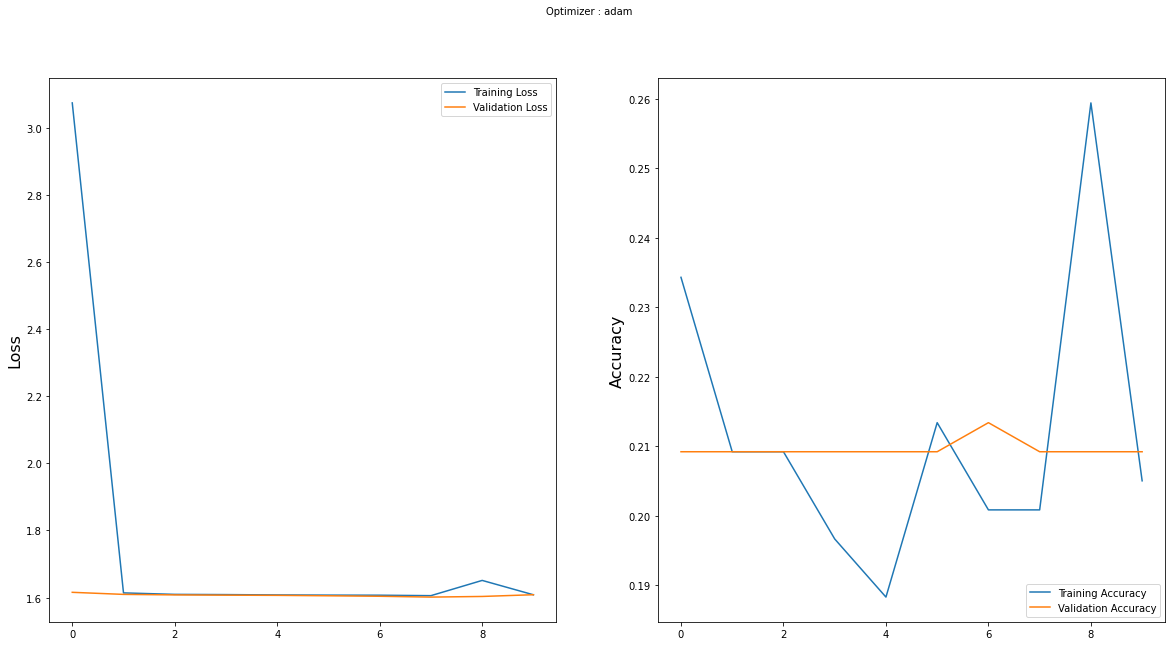

In [22]:
import matplotlib.pyplot as plt

x=r2
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# **ResNet50**

In [23]:
from tensorflow.keras.applications import ResNet50
#from tensorflow.python.keras.models import Sequential
#from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from keras import layers
from keras import models
base_model = models.Sequential()
base_model.add(ResNet50(include_top=False, weights='imagenet', pooling='max'))
base_model.add(Dense(5, activation='sigmoid'))

94773248/94765736 [==============================] - 2s 0us/step


In [24]:
base_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 10245     
Total params: 23,597,957
Trainable params: 23,544,837
Non-trainable params: 53,120
_________________________________________________________________


In [25]:
from tensorflow.keras import optimizers
base_model.compile(optimizer = optimizers.SGD(lr=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

In [27]:
resnet_history = base_model.fit(train_set, validation_data = test_set, epochs = 100)

Epoch 1/10
8/8 [==============================] - 11s 1s/step - loss: 4.5253 - acc: 0.1799 - val_loss: 1.3083 - val_acc: 0.2092
Epoch 2/10
8/8 [==============================] - 8s 1s/step - loss: 2.8344 - acc: 0.1967 - val_loss: 1.3095 - val_acc: 0.2092
Epoch 3/10
8/8 [==============================] - 8s 1s/step - loss: 1.9787 - acc: 0.1799 - val_loss: 1.2823 - val_acc: 0.2092
Epoch 4/10
8/8 [==============================] - 8s 1s/step - loss: 1.7397 - acc: 0.2092 - val_loss: 1.3881 - val_acc: 0.2092
Epoch 5/10
8/8 [==============================] - 8s 1s/step - loss: 1.5029 - acc: 0.2218 - val_loss: 1.4575 - val_acc: 0.2092
Epoch 6/10
8/8 [==============================] - 8s 1s/step - loss: 1.3414 - acc: 0.3013 - val_loss: 1.7732 - val_acc: 0.2050
Epoch 7/10
8/8 [==============================] - 8s 1s/step - loss: 1.2878 - acc: 0.2887 - val_loss: 2.1328 - val_acc: 0.2008
Epoch 8/10
8/8 [==============================] - 8s 1s/step - loss: 1.1898 - acc: 0.3054 - val_loss: 2.7342 -

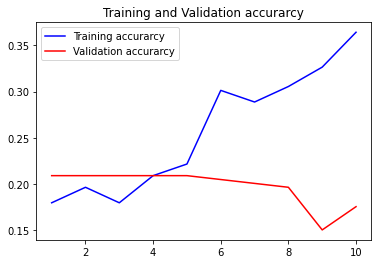

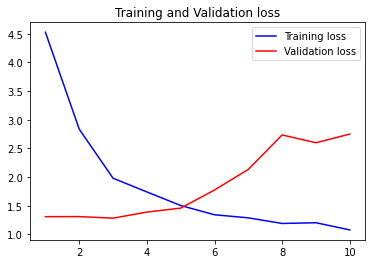

In [28]:
import matplotlib.pyplot as plt
#get the details form the history object
acc = resnet_history.history['acc']
val_acc = resnet_history.history['val_acc']
loss = resnet_history.history['loss']
val_loss = resnet_history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()
plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [29]:
base_model.save('/content/drive/MyDrive/plant/model2.h5')

# **Xception**

In [30]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.optimizers import Adam

# Defining batch and epoch sizes
batch_size = 100
epochs = 100

# Defining the pretrained base model
base = Xception(include_top=False, weights='imagenet', input_shape=(224,224,3))
x = base.output
x = GlobalAveragePooling2D()(x)
# Defining the head of the model where the prediction is conducted
head = Dense(5, activation='softmax')(x)
# Combining base and head 
model3 = Model(inputs=base.input, outputs=head)

# Compiling the model
model3.compile(optimizer=Adam(lr=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics=['accuracy'])

# Fitting the model with train and validation augmented datasets.
history = model3.fit(train_set,
                              epochs = epochs,
                              validation_data = test_set)

83689472/83683744 [==============================] - 1s 0us/step
Epoch 1/20
8/8 [==============================] - 14s 2s/step - loss: 1.3278 - accuracy: 0.5565 - val_loss: 1.1739 - val_accuracy: 0.6527
Epoch 2/20
8/8 [==============================] - 12s 1s/step - loss: 0.6125 - accuracy: 0.9749 - val_loss: 0.7213 - val_accuracy: 0.8410
Epoch 3/20
8/8 [==============================] - 12s 1s/step - loss: 0.2189 - accuracy: 0.9833 - val_loss: 0.4025 - val_accuracy: 0.9205
Epoch 4/20
8/8 [==============================] - 12s 1s/step - loss: 0.1033 - accuracy: 0.9916 - val_loss: 0.2425 - val_accuracy: 0.9582
Epoch 5/20
8/8 [==============================] - 12s 1s/step - loss: 0.0429 - accuracy: 1.0000 - val_loss: 0.1538 - val_accuracy: 0.9791
Epoch 6/20
8/8 [==============================] - 12s 1s/step - loss: 0.0301 - accuracy: 0.9958 - val_loss: 0.0885 - val_accuracy: 0.9874
Epoch 7/20
8/8 [==============================] - 12s 1s/step - loss: 0.0343 - accuracy: 1.0000 - val_loss:

In [31]:
model3.save('/content/drive/MyDrive/plant/model_xception.h5')

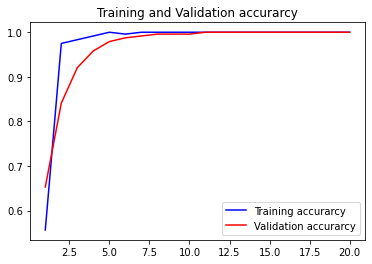

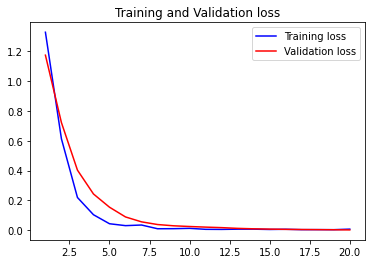

In [32]:
import matplotlib.pyplot as plt
#get the details form the history object
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
#Train and validation accuracy
plt.plot(epochs, accuracy, 'b', label='Training accurarcy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()
plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_set, test_set, test_size=0.20, random_state=2)

In [34]:
!pip install efficientnet

     |████████████████████████████████| 50 kB 3.1 MB/s 


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import scipy.misc 
import itertools 
import h5py 
import tensorflow 
import cv2 

from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from tensorflow.python.keras.models import load_model
from keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.regularizers import l1,l2 
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D,Input, SeparableConv2D, ZeroPadding2D, UpSampling2D, BatchNormalization, Input, GlobalAveragePooling2D, AveragePooling2D 
from tensorflow.keras.layers import BatchNormalization, Input, Average
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from math import sqrt
from sklearn.metrics import confusion_matrix
from IPython.display import display 


# Produce stable results 
from numpy.random import seed
from tensorflow import random 

seed(1)
tensorflow.random.set_seed(1)

# Control Variables
batch_size = 128
num_epochs = 200


# load efficientnet
import efficientnet.keras 
def ensemble():

    model_1 = load_model("/content/drive/MyDrive/plant/model1.h5")
    model_1 = Model(inputs = model_1.inputs, outputs = model_1.outputs, name = 'Incpetion')

    model_2 = load_model("/content/drive/MyDrive/plant/model_xception.h5")
    model_2 = Model(inputs = model_2.inputs, outputs = model_2.outputs, name = 'Xception')


    models = [model_1, model_2]


    models_input = Input(shape =(224,224,3))
    models_output = [model(models_input) for model in models]
    
    ensemble_output = Average()(models_output)

    simple_average = Model(inputs = models_input, outputs = ensemble_output, name = 'Ensemble')

    return simple_average


model = ensemble()
model.summary()
model.save('/content/drive/MyDrive/plant/all.h5')


# Confusion Matrix
def plot_confusion_matrix(y_val, y_pred, classes,
                          normalize=False,
                          title='Unnormalized confusion matrix',
                          cmap=plt.cm.Blues):
    cm = confusion_matrix(y_val, y_pred)
    
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)
        
    np.set_printoptions(precision=2)
        
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.min() + (cm.max() - cm.min()) / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True expression')
    plt.xlabel('Predicted expression')
    plt.show()



Model: "Ensemble"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Incpetion (Functional)          (None, 5)            54528741    input_4[0][0]                    
__________________________________________________________________________________________________
Xception (Functional)           (None, 5)            20871725    input_4[0][0]                    
__________________________________________________________________________________________________
average (Average)               (None, 5)            0           Incpetion[0][0]                  
                                                                 Xception[0][0]            

In [37]:
y_pred_ = model.predict(X_val, verbose=1)
y_pred = np.argmax(y_pred_, axis=1)
#t_te = np.argmax(y_val, axis=1)
classes = np.array(("1", "2", "3", "4", "5"))

1/1 [==============================] - 1s 728ms/step


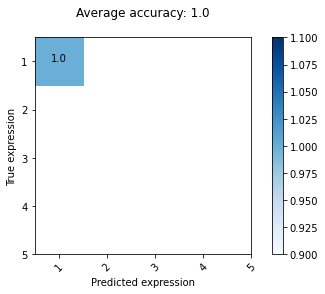

In [39]:
fig = plot_confusion_matrix(y_val=y_pred, y_pred=y_pred,
                      classes=classes,
                      normalize=True,
                      cmap=plt.cm.Greys,
                      title='Average accuracy: ' + str(np.sum(y_pred == y_pred)/len(y_pred)) + '\n')
